## Project - Fundamentals of Data Analysis

### Course: HDip in Computing in Data Analytics
### Module:  Fundamentals of Data Analysis
### Lecturer: Ian McLoughlin
### Student: Sarah Hastings 


* The project is to create a notebook investigating the variables and data points within the well-known iris flower data set associated with Ronald A Fisher.

* In the notebook, you should discuss the classification of each variable within the data set according to common variable types and scales of measurement in mathematics, statistics, and Python.

* Select, demonstrate, and explain the most appropriate summary statistics to describe each variable.

* Select, demonstrate, and explain the most appropriate plot(s) for each variable.

* The notebook should follow a cohesive narrative about the data set.

## Importing Libraries

In [1]:
#Firstly import pandas to allow for data analysis, manipulation
import pandas as pd
#Use Pyplot, part of the Matplotlib library to visualize the diagram/use for visual data/plots etc 
import matplotlib.pyplot as plt
#For working with numerical data, arrays
import numpy as np
#Importing seaborn gives a variety of visualization patterns in addition to matplotlib
import seaborn as sns
#Useful for plotting visual relationships between data 
from pandas.plotting import andrews_curves
#Split the dataset into train and test models
from sklearn.model_selection import train_test_split
#Training model
from sklearn.preprocessing import StandardScaler
#Classification and Logistic regression
from sklearn.linear_model import LogisticRegression
#View accuracy/predictability
from sklearn.metrics import accuracy_score,confusion_matrix


In [2]:
# Read iris.data file into a DataFrame

df = pd.read_csv('iris.data', delimiter=',')

In [3]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
## Summary of the data 

#print(df.shape)
#print(df.head())
#print(df.tail())
#print(df.info())
#print(df.describe())
#print(df.nunique())
#print(df.isnull())
#print(df.isnull().any())
#print(df.isnull().sum())
#print(df['species'].value_counts())

In [5]:
# Adding column names

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [6]:
# Read iris.data file into a DataFrame with column names
df = pd.read_csv('iris.data', delimiter=',', names=col_names)
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# Get a summary of each variable 
with open('iris_summary.txt', 'w') as f:
    #Create a variable/heading name for each 
    sepal_length_summary = df['sepal_length'].describe()
    sepal_width_summary = df['sepal_width'].describe()
    petal_length_summary = df['petal_length'].describe()
    petal_width_summary = df['petal_width'].describe()
    
    #Write the summary information to the new text file 
    #f.write('Summary for Sepal Length:\n{}\n\n'.format(sepal_length_summary))
    #f.write('Summary for Sepal Width:\n{}\n\n'.format(sepal_width_summary))
    #f.write('Summary for Petal Length:\n{}\n\n'.format(petal_length_summary))
    #f.write('Summary for Petal Width:\n{}\n\n'.format(petal_width_summary))

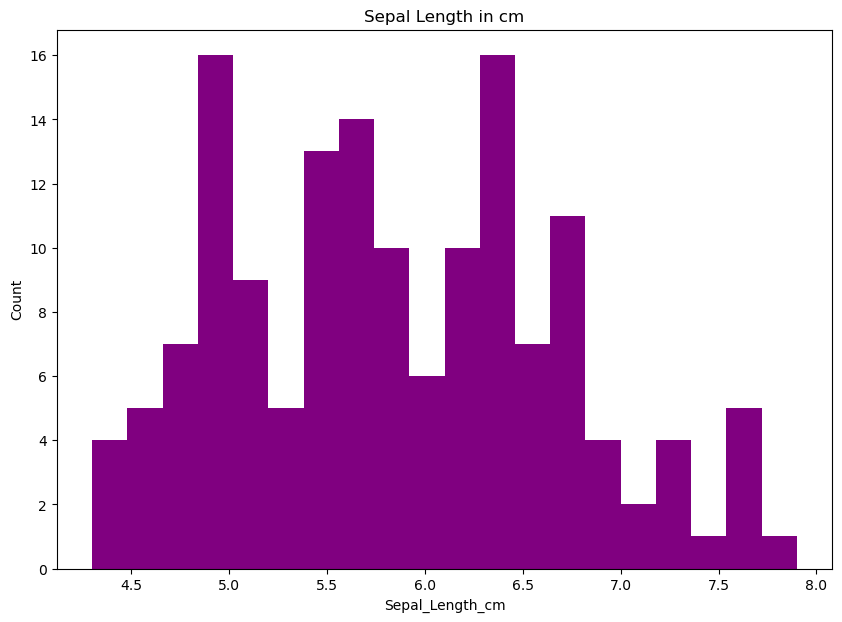

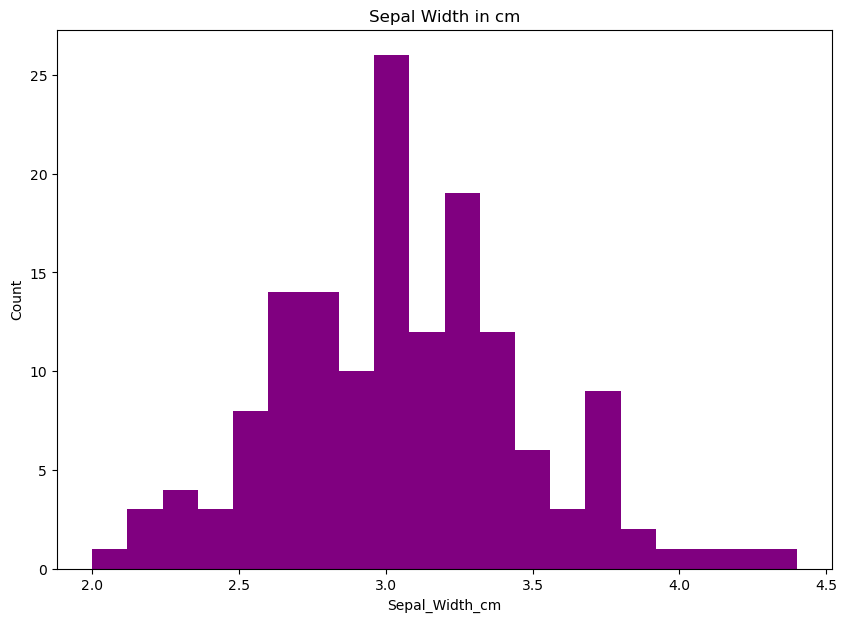

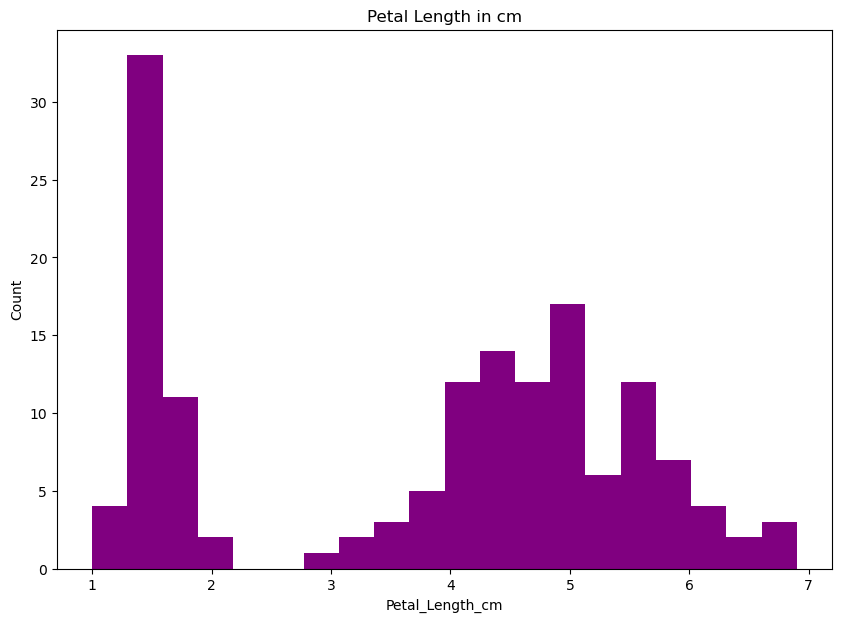

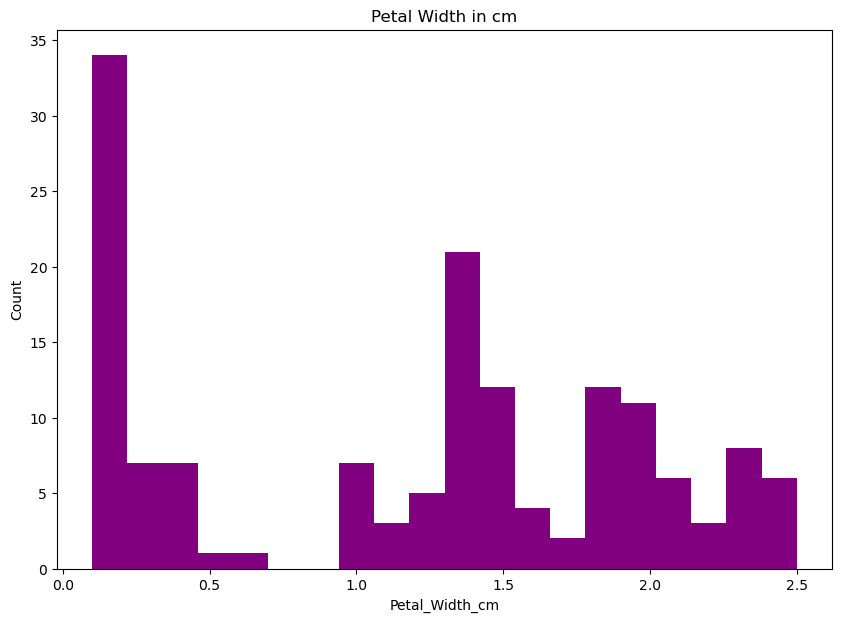

In [8]:
# Create a variable for the the dataset, ensure to include columns
iris = pd.read_csv('iris.data', delimiter=',', names=col_names)

# Histograms for each attribute

plt.figure(figsize = (10, 7))
x = iris["sepal_length"]
  
plt.hist(x, bins = 20, color = "purple")
plt.title("Sepal Length in cm")
plt.xlabel("Sepal_Length_cm")
plt.ylabel("Count")


plt.figure(figsize = (10, 7))
x = iris.sepal_width
  
plt.hist(x, bins = 20, color = "purple")
plt.title("Sepal Width in cm")
plt.xlabel("Sepal_Width_cm")
plt.ylabel("Count")
  

plt.figure(figsize = (10, 7))
x = iris.petal_length
  
plt.hist(x, bins = 20, color = "purple")
plt.title("Petal Length in cm")
plt.xlabel("Petal_Length_cm")
plt.ylabel("Count")
  

plt.figure(figsize = (10, 7))
x = iris.petal_width
  
plt.hist(x, bins = 20, color = "purple")
plt.title("Petal Width in cm")
plt.xlabel("Petal_Width_cm")
plt.ylabel("Count")
  
plt.show()

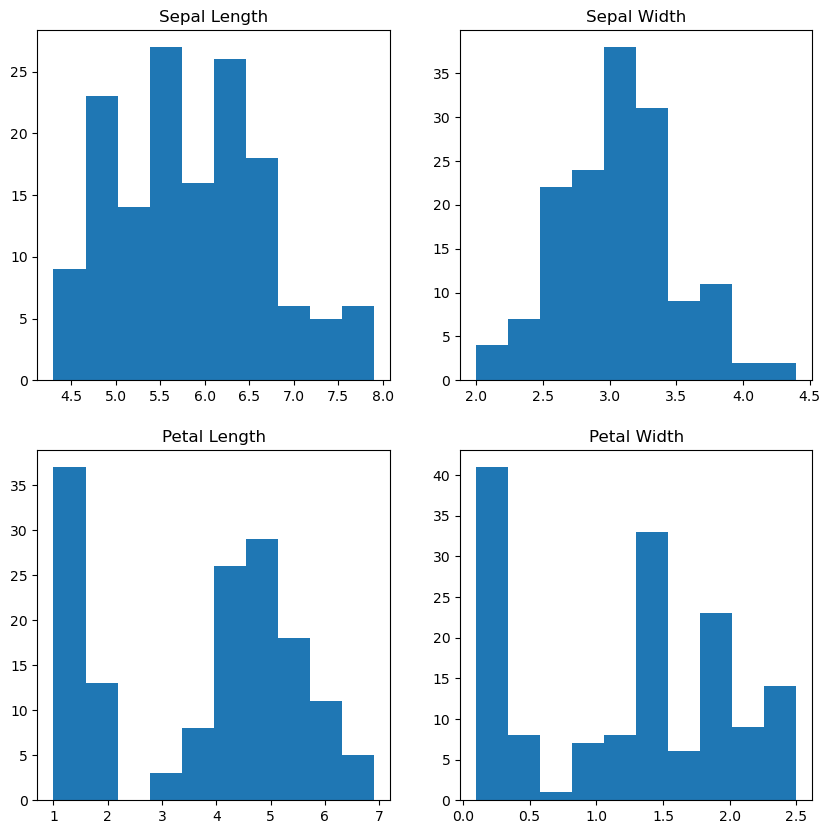

In [9]:
# Create subplots to create histogram of all variables together
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Create a histogram for each variable
axs[0, 0].hist(iris['sepal_length'], bins=10)
axs[0, 0].set_title('Sepal Length')
axs[0, 1].hist(iris['sepal_width'], bins=10)
axs[0, 1].set_title('Sepal Width')
axs[1, 0].hist(iris['petal_length'], bins=10)
axs[1, 0].set_title('Petal Length')
axs[1, 1].hist(iris['petal_width'], bins=10)
axs[1, 1].set_title('Petal Width')

# Display the subplots
plt.show()

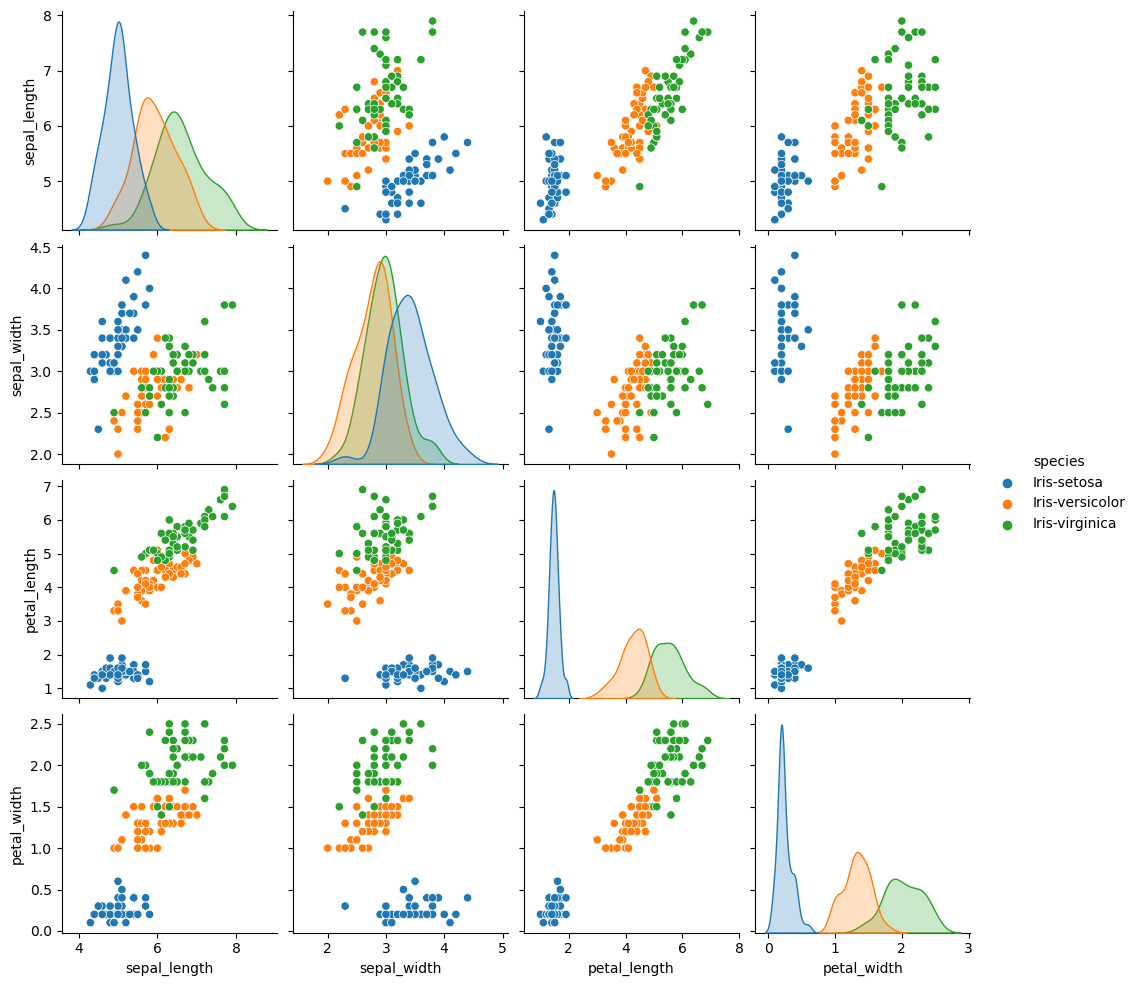

In [10]:
# Create a pairplot - using seaborn and matplotlib module - this is a useful in visualising the 3 species in pairs and see how they pair up together

sns.pairplot(iris, hue='species')

plt.show()

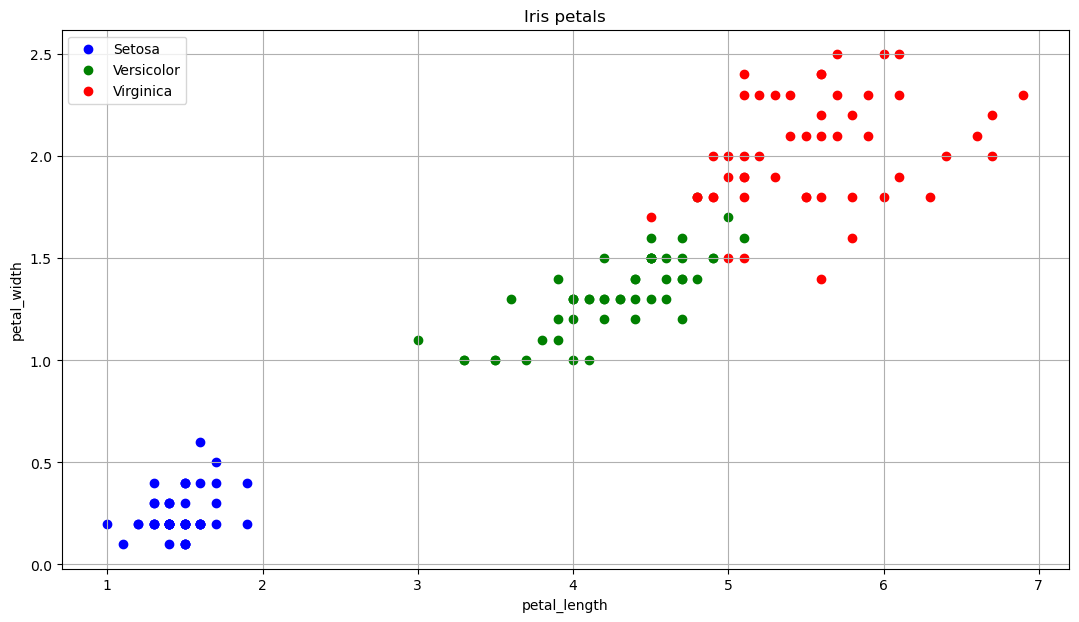

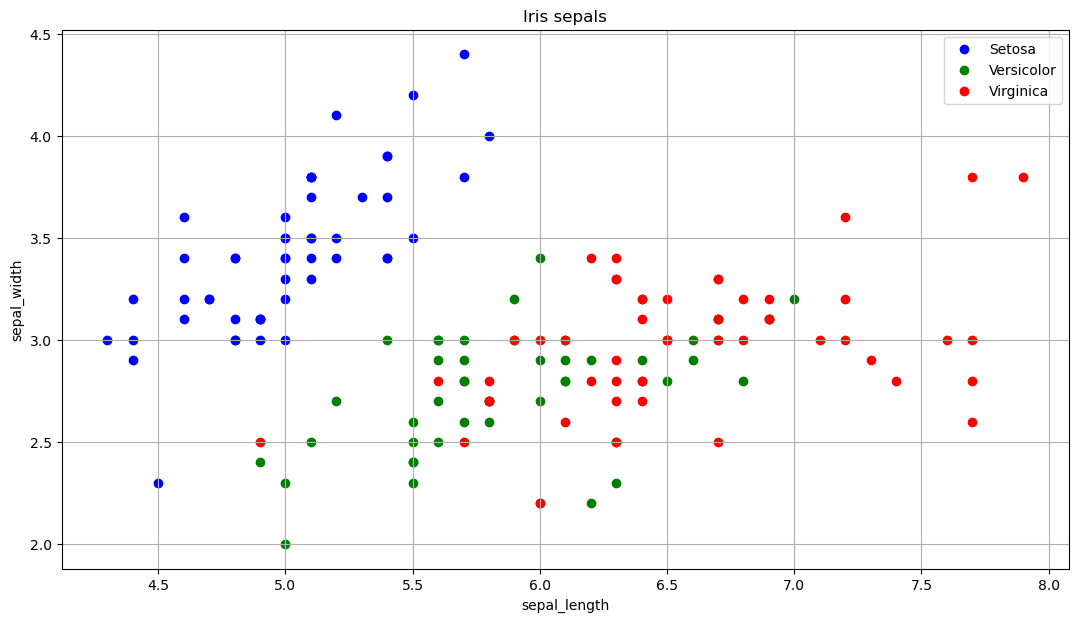

In [ ]:
#Scatter plot of variables for petals, sepals
setosa = df[df.species == "Iris-setosa"]
versicolor = df[df.species=='Iris-versicolor']
virginica = df[df.species=='Iris-virginica']

fig, ax = plt.subplots()
#Adjusting the length and width of plot
fig.set_size_inches(13, 7) 

#Lables and scatter points
ax.scatter(setosa['petal_length'], setosa['petal_width'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal_length'], versicolor['petal_width'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal_length'], virginica['petal_width'], label="Virginica", facecolor="red")

#Petals data
ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')
ax.grid()
ax.set_title('Iris petals')
ax.legend()
#plt.savefig('Iris petals')

#Sepals data
fig, ax = plt.subplots()
fig.set_size_inches(13, 7)
#Lables and scatter points
ax.scatter(setosa['sepal_length'], setosa['sepal_width'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['sepal_length'], versicolor['sepal_width'], label="Versicolor", facecolor="green")
ax.scatter(virginica['sepal_length'], virginica['sepal_width'], label="Virginica", facecolor="red")

ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.grid()
ax.set_title('Iris sepals')
ax.legend()
#plt.savefig('Iris sepals')
plt.show()


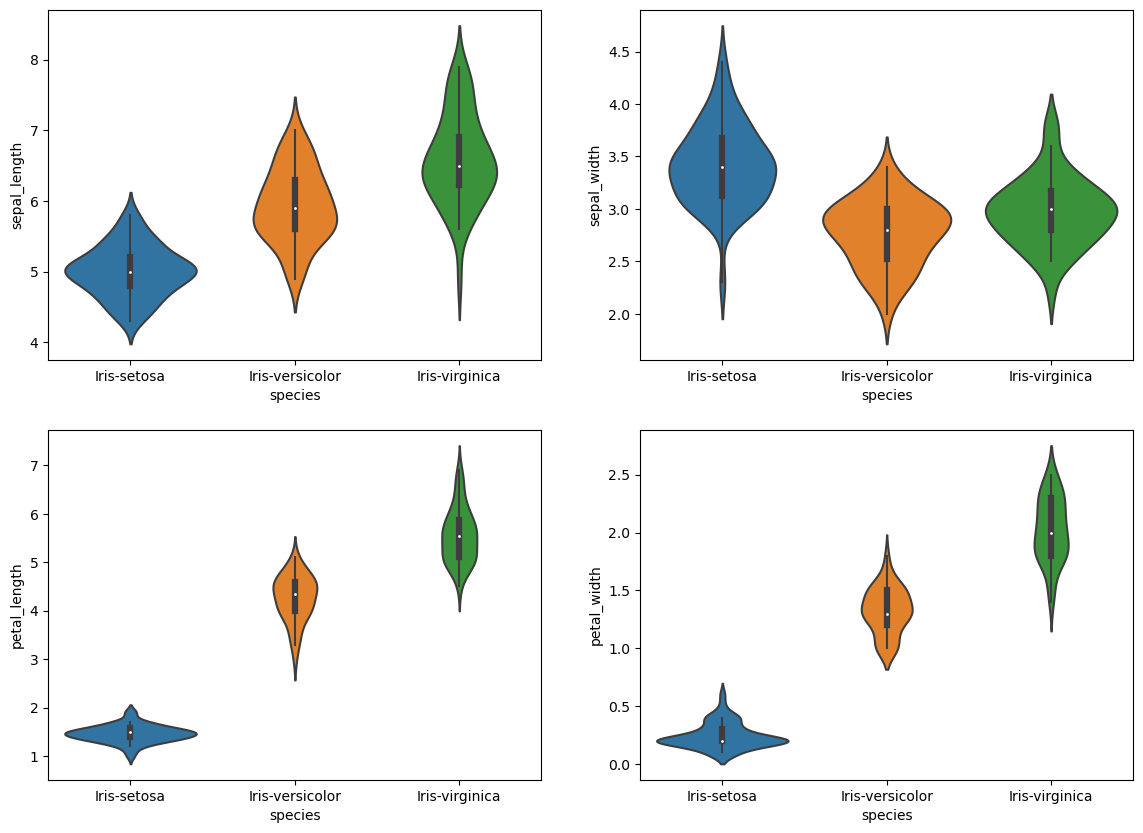

In [12]:
#Create a violin plot - another usual visual using seaborn
#Adjust the length and width of plot
plt.figure(figsize=(14,10))  
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width',data=df)
plt.show() 

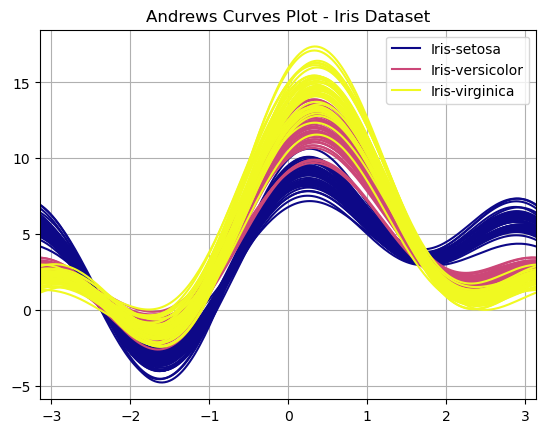

In [13]:
# Andrews Curves - visual using pandas, create the curves plot with the colormap
andrews_curves(df, 'species', colormap='plasma')
plt.title('Andrews Curves Plot - Iris Dataset')
plt.show()

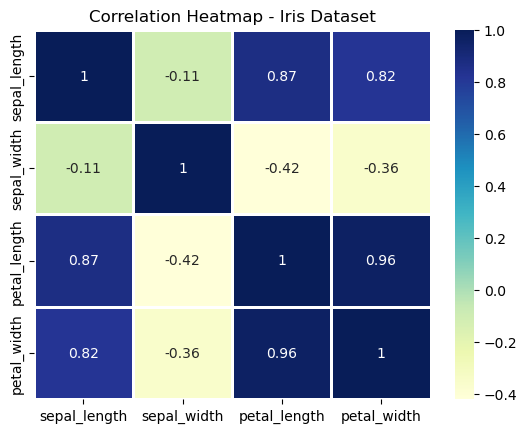

In [ ]:
#Correlation matrix & heatmap - further analysis on relationship and patterns, displaying in a heatmap, note the creation of a variable to obtain the numeric data for this function
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
#print(correlation_matrix)
sns.heatmap(correlation_matrix, cmap = "YlGnBu", linecolor = 'white', linewidths = 1, annot = True)
plt.title('Correlation Heatmap - Iris Dataset')
plt.show()

In [15]:
#Split the Data Into Train and Test Datasets, using iloc to get specific rows/columns from the dataframe needed for the train, test sets 
x = df.iloc[:,:-1].values
y = df.iloc[:,4].values
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
#Testing the shape to ensure correct values based on the 75% training, 25% test split on the data, you can use the below shape() function
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(112, 4)
(38, 4)
(112,)
(38,)


In [16]:
#Create the Model (Classification - logistic regression)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
#print(y_pred)
cm=(confusion_matrix(y_test,y_pred))
#print(cm)

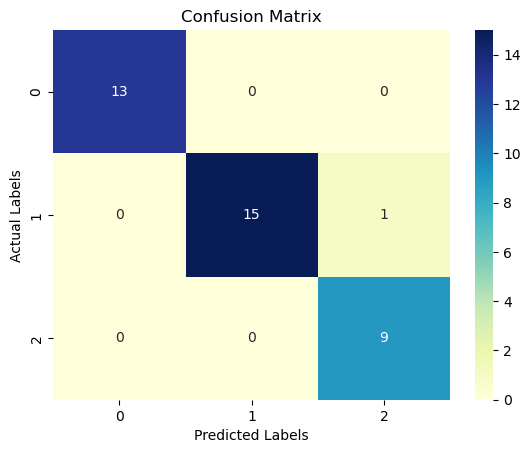

In [ ]:
#Display the confusion matrix
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
#plt.savefig('Confusion matrix Iris Dataset.png') 
plt.show()

In [ ]:
accuracy=accuracy_score(y_test,y_pred)*100 
print("Accuracy of the model is {:.2f}".format(accuracy),"%.")


Accuracy of the model is 97.37 %.


### End